In [2]:
import cv2
import imutils
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import time
from base64 import b64encode
from IPython.display import Image
from pylab import rcParams

In [3]:
rcParams['figure.figsize'] = 10, 20

In [6]:
def makeImageData(imgpath):
    img_req = None
    with open(imgpath, 'rb') as f:
        ctxt = b64encode(f.read()).decode()
        img_req = {
            'image': {
                'content': ctxt
            },
            'features': [{
                'type': 'DOCUMENT_TEXT_DETECTION',
                'maxResults': 1
            }]
        }
    return json.dumps({"requests": img_req}).encode()

In [57]:
def requestOCR(url, api_key, imgpath):
  imgdata = makeImageData(imgpath)
  response = requests.post(ENDPOINT_URL, 
                           data = imgdata, 
                           params = {'key': api_key}, 
                           headers = {'Content-Type': 'application/json'})
  return response

In [58]:
with open('./Api/API_key.json') as f:
    data = json.load(f)

In [59]:
ENDPOINT_URL = 'https://vision.googleapis.com/v1/images:annotate'
# api_key = data["private_key_id"]
api_key = data["API_key"]
img_loc = "./Media_files/invoice.png"

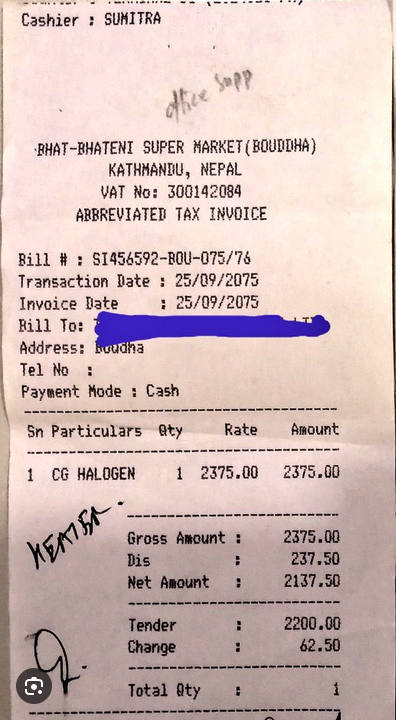

In [46]:
Image(img_loc)

In [60]:
result = requestOCR(ENDPOINT_URL, api_key, img_loc)

In [61]:
if result.status_code != 200 or result.json().get('error'):
    print ("Error")
    print (result.text)
    
else:
    result = result.json()['responses'][0]['textAnnotations']

Error
{
  "error": {
    "code": 403,
    "message": "This API method requires billing to be enabled. Please enable billing on project #27700017839 by visiting https://console.developers.google.com/billing/enable?project=27700017839 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry.",
    "status": "PERMISSION_DENIED",
    "details": [
      {
        "@type": "type.googleapis.com/google.rpc.Help",
        "links": [
          {
            "description": "Google developers console billing",
            "url": "https://console.developers.google.com/billing/enable?project=27700017839"
          }
        ]
      },
      {
        "@type": "type.googleapis.com/google.rpc.ErrorInfo",
        "reason": "BILLING_DISABLED",
        "domain": "googleapis.com",
        "metadata": {
          "consumer": "projects/27700017839",
          "service": "vision.googleapis.com"
        }
      }
    ]
  }
}



In [62]:
result

<Response [403]>

In [ ]:
for index in range(len(result)):
  print(result[index]["description"])

In [ ]:
def gen_cord(result):
  cord_df = pd.DataFrame(result['boundingPoly']['vertices'])
  x_min, y_min = np.min(cord_df["x"]), np.min(cord_df["y"])
  x_max, y_max = np.max(cord_df["x"]), np.max(cord_df["y"])
  return result["description"], x_max, x_min, y_max, y_min

In [ ]:
text, x_max, x_min, y_max, y_min = gen_cord(result[-1])
image = cv2.imread(img_loc)
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,255, 0),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print ("Text Detected = {}".format(text))